### This notebook consists of an analysis performed on the PPO-MLP DRL agent using methodology from "4.Understanding of DRL agents used in Cloud Resource Management" chapter presented in the paper "Towards understanding of Deep Reinforcement Learning Agents used in Cloud Resource Management" 

In [2]:
import sys
import os

sys.path.append(os.getcwd()+'/../analysis/src/')
%load_ext autoreload
%autoreload 2

from drl_agent_interpreter import DRLAgentInterpreter
from policy_evolution import PolicyEvolution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Build DRL agent intepreter
### - load the agent and input observations
### - make predictions
### - calculate feature attributions


In [53]:
drl_agent_interpreter = DRLAgentInterpreter(drl_agent_type='PPO',
                                            dnn_model_architecture='MLP',
                                            agent_path='../initial_model/best_models/ppo_MlpPolicy',
                                            observations_path='../initial_model/observations/observations_ppo_MlpPolicy_1.npy')


## Histogram of the actions

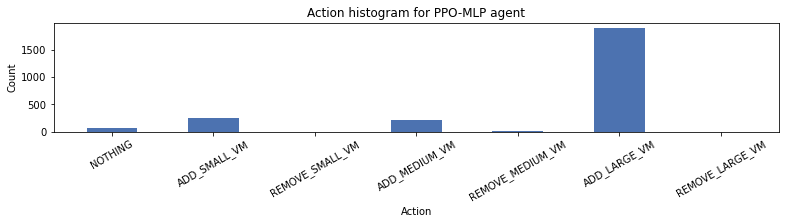

In [55]:
drl_agent_interpreter.plot_action_histogram()

## 4.2 Sample run - agent response (VM allocation) to the workload changes

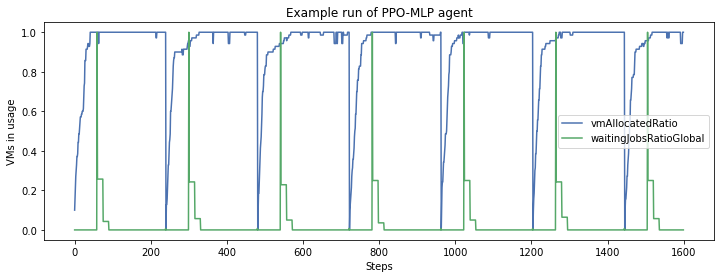

In [56]:
drl_agent_interpreter.plot_allocation_vs_queue()

## 4.4 Policy summarization (mean attributions over the example observations)

### Absolute Mean Attributions - Feature Importance

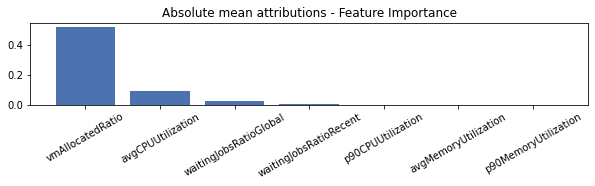

In [57]:
drl_agent_interpreter.plot_mean_attributions(absolute_values=True)

### Mean attributions

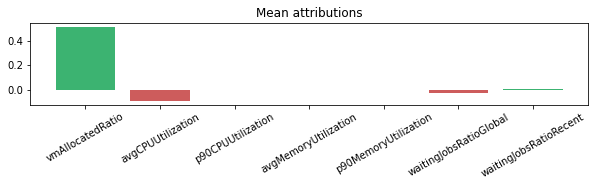

In [58]:
drl_agent_interpreter.plot_mean_attributions()

## 4.5 Evolution of policies during training (watching the process of policy formation)

In [59]:
policy_evolution = PolicyEvolution(n_training_steps=100000,
                                   step_value=25000,
                                   drl_agent_type='PPO',
                                   dnn_model_architecture='MLP',
                                   base_path='../output_models_initial/ppo/MlpPolicy/best_model',
                                   observations_path='../initial_model/observations/observations_ppo_MlpPolicy_1.npy')



### Evolution of PPO-MLP policy Feature Importance

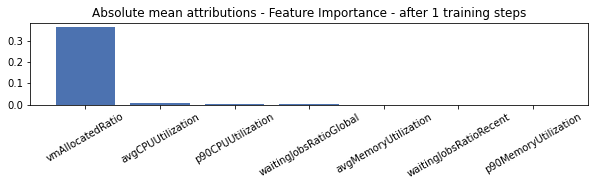

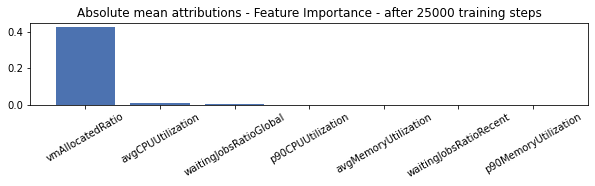

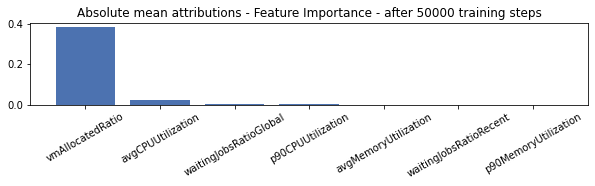

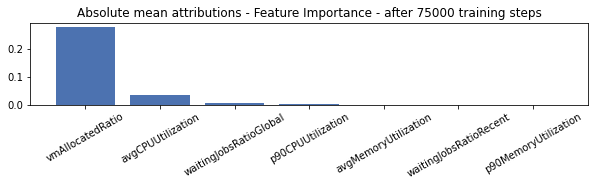

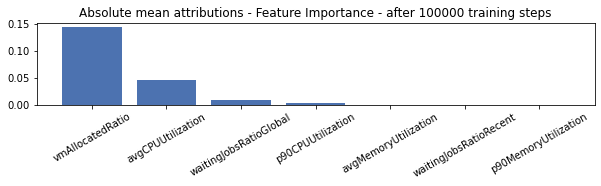

In [60]:
policy_evolution.plot_mean_attributions(absolute_values=True)

### Evolution of PPO-MLP policy Mean Attributions

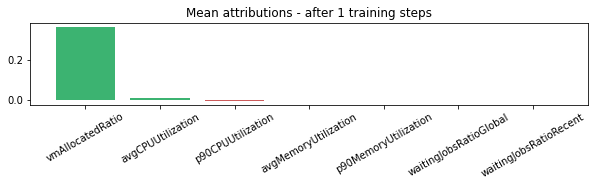

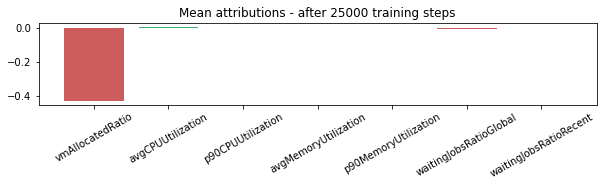

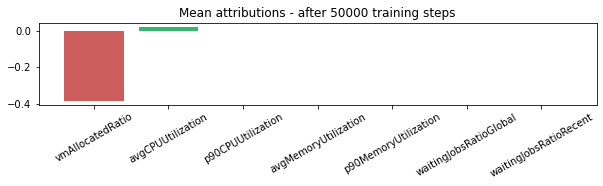

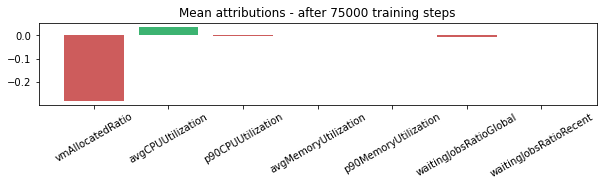

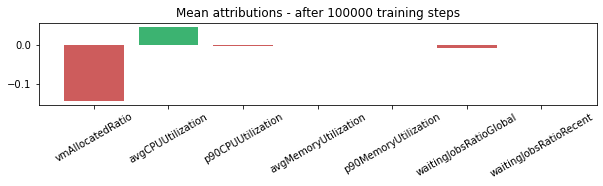

In [61]:
policy_evolution.plot_mean_attributions(absolute_values=False)

### Evolution of PPO-MLP reposnse and attributions for the same environment state

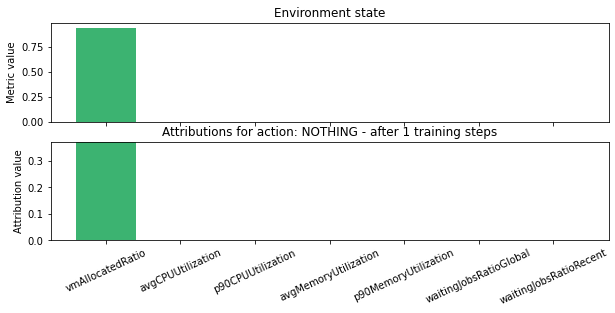

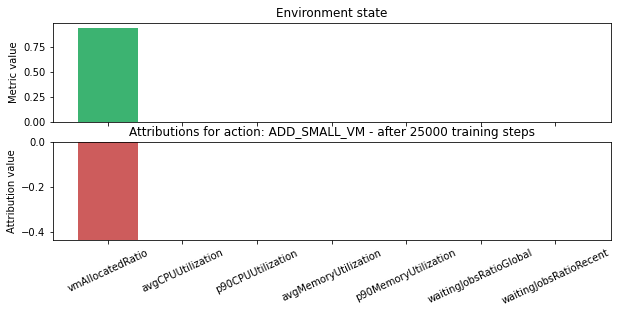

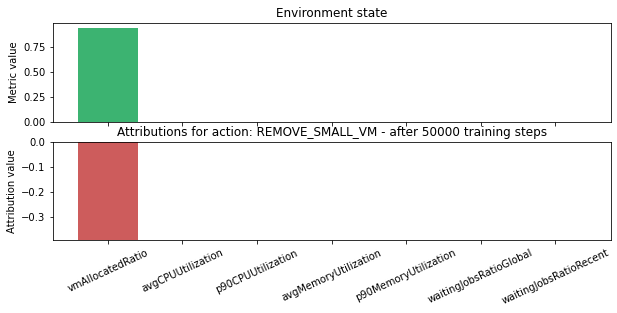

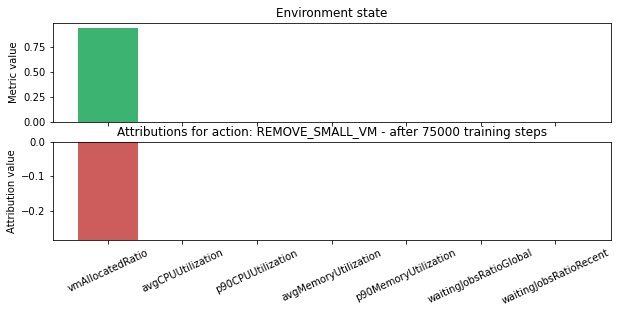

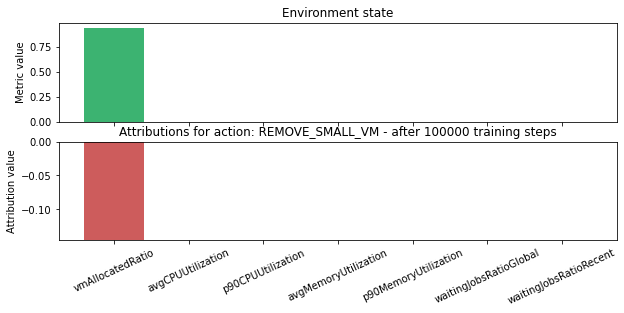

In [62]:
policy_evolution.explain_example(idx=300)

## 5.6 Debugging (examining agent predictions for example observations)

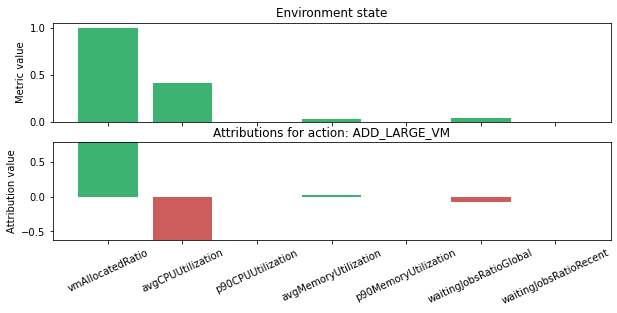

In [63]:
drl_agent_interpreter.feature_attributor.explain_example(idx=424)

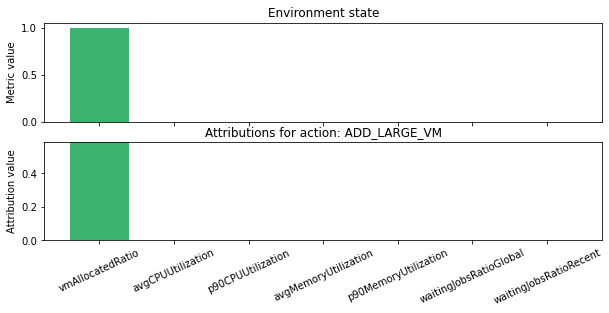

In [64]:
drl_agent_interpreter.feature_attributor.explain_example(idx=1)

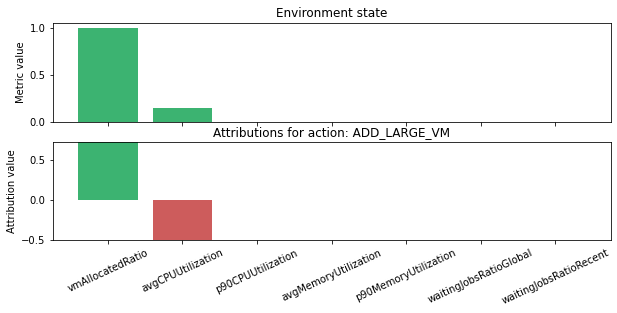

In [65]:
drl_agent_interpreter.feature_attributor.explain_example(idx=10)